# OPEN CV
Es una biblioteca de codigo abierto desarrollada en 1999 escrita c/c++ y actualmente es compatible con python, que permite a la computadora tener una vision artificial y que esta pueda ver y ser enseñada a visualizar como humanos 

In [2]:
#Importando libreria para procesamiento de imagenes
import cv2

In [3]:
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')

MOSTRANDO IMAGEN

In [4]:
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 


-1

## CONVIRTIENDO IMAGEN A BLANCO Y NEGRO
(https://datahacker.rs/how-to-access-and-edit-pixel-values-in-opencv-with-python/)

https://www.pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/


Las computadoras generalmente leen el color como una serie de 3 valores (rojo, verde y azul (RGB)) en la misma escala de 0 a 255. Ahora, cada píxel en realidad tiene 3 valores para que la computadora los almacene además de su posición

Es un metodo de segmentacion de imagen que a partir de una en escala de grises se crea una imagen binaria, incluyendo a cada vecino del pixel y el
resultado de la operación se considera como una matriz binaria. 
Es como una normalizacion de los datos para un uso mas general debido a la cantidad inmensa de pixeles que existe lo cual no seria facil de procesar para una computadora debido a la forma de almacenar datos de imágenes en la memoria de la computadora consiste simplemente en una lista lineal cada vez mayor de espacios de direcciones.



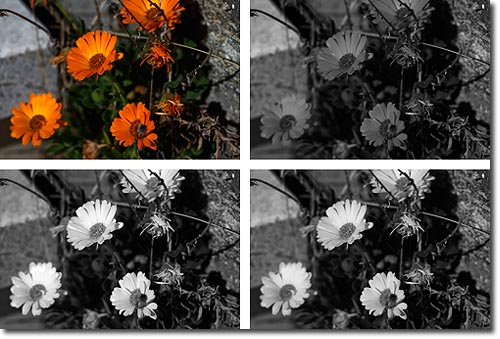

## OPENCV cvtColor : 
Pasa la imagen a una escala de grises, ejemplo:
*   ctvColor(imagen_a_convertir,COLOR_CodigoDeColorGris)

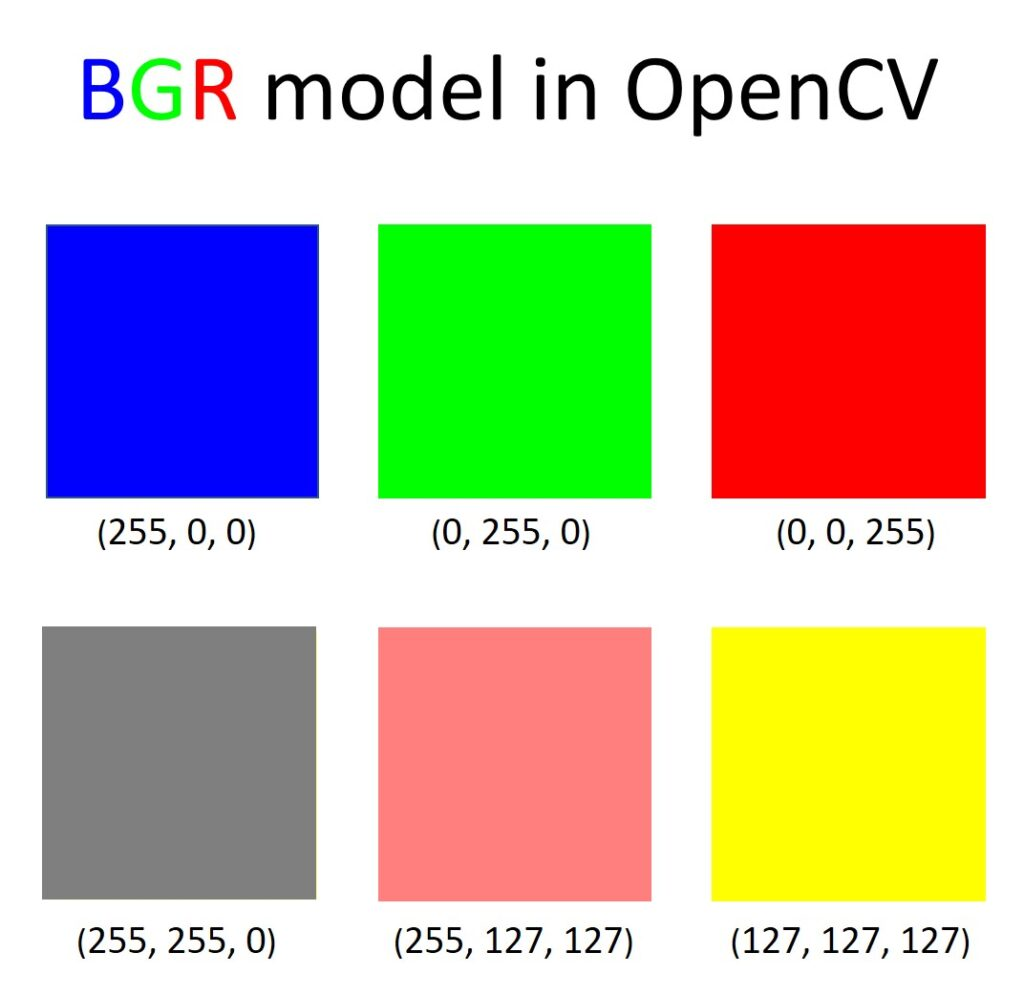

https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html


En este ejemplo se usara el mas basico el bgr2grade

In [5]:
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)

-1

## UMBRALIZANDO SIMPLE LA IMAGEN EN BLANCO Y NEGRO
http://acodigo.blogspot.com/2017/07/umbralizacion-en-opencv.html


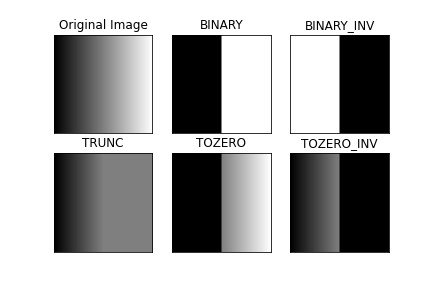

<img src="captura.jpg">

El umbralizado simple consta de que para cada pixel se aplica un mismo valor de umbral, si el valor del pixel es menor que el umbral, se establece 0, de lo contrario se establece un valor maximo, para esto en cv se usa: 
* thresholding : Sirve para aplicar un umbral simple, es para separar el objeto de su entorno, sus parametros son:
    * Primer argumento : Imagen de origen en escala de grises
    * Segundo argumento : Valor del umbral que se utiliza para clasificar los valores de los pixeles
    * Tercer argumento : Valor maximo que se asigna a los valores de los pixeles que superan el umbral 
    * Cuarto argumento : Tipo de umbrales simples que ofrece la libreria cv 
    





## RESUMEN DE FUNCION

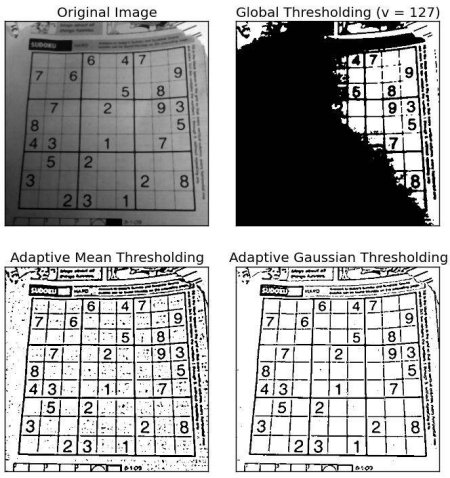

La imagen al dividirse en rojo, verde y azul tienen limites que van del 0 al 255
Para poder modificar los colores en sus tonalidades se debe usar los numeros similar a la siguiente representacion
* Canales (R,G,B) -> Modificando Tonalidades (52,125,255)
R=Rojo
G=Verde
B=Azul
Ejemplos de utilizacion donde se trabaja en con diferentes escalas de grises debido a esto hay solo dos numeros
img = cv.imread('gradient.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
Hay que destacar que se pueden combinar escalas de grises, la umbralizacion se realiza de manera experimental debido a la calidad de imagen con la que se trabaje


El metodo devuelve dos salidas:
* El tipo de umbral que se uso
* La imagen umbralizada

In [6]:
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,100,255,cv2.THRESH_BINARY)
print(tipo_umbral)
cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 

100.0


-1

## CONTORNOS

## OBTENIENDO CONTORNOS

# FIND CONTOURS
Funcion destinada a encontrar contornos, requisitos pedidos para utilizar la funcion
* Umbral : Se necesita una imagen del objeto ya en blanco y negro y separada del entorno

* Mode : Es la salida de datos (Lista, array)

* Method :
    
    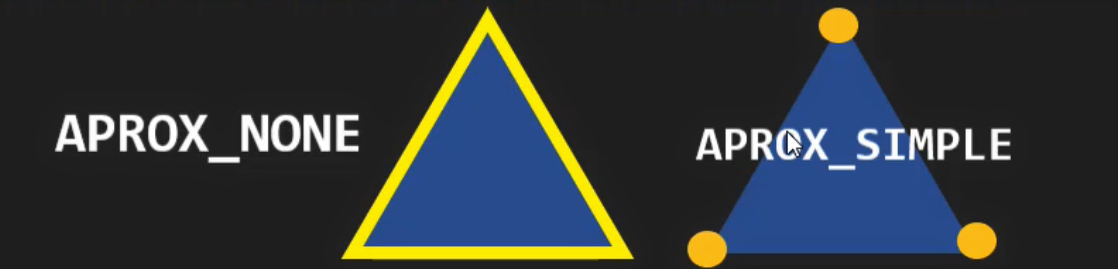
    
    Aprox_None : Encuentra la forma o contorno del objeto encerrandolo con puntos
    Aprox_Simple : Encuentra la forma o contorno promediando los puntos y dandote puntos en los limites de la figura (Mas recomendable, usa menos memoria)


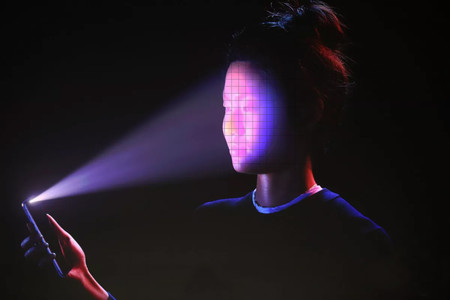

Resumiendo un contorno se puede explicar como una curva que une todos los puntos continuos (a lo largo del limite), que tienen el mismo color o intensidad.Los contornos son una herramienta util para el analisis de formas y deteccion y reconocimiento de objetos

cv.findContours() tiene tres argumentos los cuales son:
* Primero : Imagen de origen
* Segundo : Modo de recuperacion de contorno (lista,..)
* Tercero : Metodo de aproximacion del contorno (approx_none,approx_simple)

Devuelve o genera una imagen modificada, contours es una lista de python con todos los contornos de la imagen. Cada contorno individual es una matriz numpy de cordenadas (x,y) de los putnos limites del objeto

En OpenCv encontrar el contorno es encontrar el objeto de color blanco sobre un fondo negro, por esto se umbraliza previamente

In [9]:
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.THRESH_TOZERO,cv2.CHAIN_APPROX_SIMPLE)

## DIBUJANDO CONTORNOS CON DRAWCONTOURS OPENCV
Para dibujar los contornos de una imagen procesada, se necesita enviar los siguientes argumentos a la funcion

cv.drawContours(imagen,lista_contornos,index(-1:Todos los contornos),(r(0-255),g(0-255),b(0-255)),indice de contorns)

cv.drawContours() tiene principalmente 3 argumentos los cuales son:

* Primero : Imagen de origen
* Segundo: Contornos pasados como una lista python
* Tercero : Indice de contornos (-1 dibujar todos los contornos)


In [10]:
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#(65,105,225) -> Colores en rgb
# 5 = Ancho del resaltado
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

-1

# JUGANDO CON UMBRALIZACIONES


# THRESH_TRUNC
En este caso si la intensidad del pixel es superior al umbral entonces el pixel destino se establece a el valor del umbral, en caso contrario el valor será igual al original, en otras palabras, cualquier pixel que supere el umbral tomará el valor del mismo, los demás permanecen igual.


In [1]:
import cv2
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')
#cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,100,255,cv2.THRESH_TRUNC)
print(tipo_umbral)
#cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

100.0


115

## THRESH_BINARY_INV
Similar al anterior, solo que aplicado al inverso, si la intensidad supera el umbral definido el valor resultante será establecido a cero, en caso contrario se establecerá al máximo valor definido.



In [1]:
import cv2
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')
#cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,100,255,cv2.THRESH_BINARY_INV)
print(tipo_umbral)
#cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

100.0


-1

## THRESH_TOZERO
Cualquier pixel cuya intensidad no supere el umbral se establecerá a cero, se define de la siguiente manera:

In [2]:
import cv2
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')
#cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,100,255,cv2.THRESH_TOZERO)
print(tipo_umbral)
#cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

100.0


-1

## CALCULANDO EL UMBRAL MAS OPTIMO DE MANERA AUTOMATICA CON OPENCV

In [3]:
import cv2
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')
#cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,0,255,cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
print(tipo_umbral)
#cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

36.0


-1

## CALCULANDO EL UMBRAL MAS OPTIMO DE MANERA AUTOMATICA CON OPENCV USANDO UMBRAL THRESH_OTSU

In [4]:
import cv2
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')
#cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,100,255,cv2.THRESH_BINARY )
print(tipo_umbral)
#cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

100.0


-1

## CALCULANDO EL UMBRAL MAS OPTIMO DE MANERA AUTOMATICA CON OPENCV Y USANDO CHAIN APPROX NONE

In [5]:
import cv2
#Leyendo Imagen
imagen=cv2.imread('contorno.jpg')
#cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 
#Convertir imagen a grises 
grises=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imagen En escala de grises',grises)
cv2.waitKey(0)
# Umbralizando la imagen 
tipo_umbral,umbral=cv2.threshold(grises,100,255, cv2.THRESH_TRIANGLE)
print(tipo_umbral)
#cv2.imshow('Imagen Umbralizada',umbral)
cv2.waitKey(0) 
#Obteniendo contornos
contorno, jerarquia = cv2.findContours(umbral,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(imagen,contorno,-1,(65,105,225),5)
cv2.imshow('imagen',imagen)
#Temporizador para mantener ventana de video
# 1=Fluido para video o camara web
# 0=Estatico para una imagen
cv2.waitKey(0) 

36.0


-1